In [618]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [619]:
full_df= pd.read_csv('Data/full_data_growth_included.csv', index_col=0)

In [620]:
full_df.head()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases
0,Alabama,2020-03-13,7.0,32.0,26.0,7.0,-2.0,0.0,160.430000,110.95,110.84,6,0,NaN,NaN
1,Alabama,2020-03-14,1.0,28.0,55.0,12.0,4.0,0.0,169.976429,116.64,114.48,12,0,100.000000,6.0
2,Alabama,2020-03-15,-7.0,16.0,16.0,6.0,-4.0,2.0,119.303036,78.24,59.90,23,0,91.666667,11.0
3,Alabama,2020-03-16,-2.0,24.0,22.0,2.0,-10.0,4.0,116.498750,91.18,77.73,29,0,26.086957,6.0
4,Alabama,2020-03-17,-11.0,17.0,25.0,-1.0,-17.0,7.0,107.171250,84.92,72.97,39,0,34.482759,10.0


In [621]:
# Extract California dataset
ca= full_df[full_df['state'] == 'California']
ca.head()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases
450,California,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0,149.625000,98.747059,161.364286,7,0,0.0,0.0
451,California,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0,128.067973,85.542941,127.493810,7,0,0.0,0.0
452,California,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0,131.830676,98.512353,119.583333,7,0,0.0,0.0
453,California,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0,114.652568,110.847059,109.419524,7,0,0.0,0.0
454,California,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0,115.025946,110.649412,112.455238,7,0,0.0,0.0


In [622]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 450 to 581
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  132 non-null    object 
 1   date                   132 non-null    object 
 2   retail_and_recreation  132 non-null    float64
 3   grocery_and_pharmacy   132 non-null    float64
 4   parks                  132 non-null    float64
 5   transit                132 non-null    float64
 6   workplace              132 non-null    float64
 7   residential            132 non-null    float64
 8   driving gps hits       132 non-null    float64
 9   transit gps hits       132 non-null    float64
 10  walking gps hits       132 non-null    float64
 11  cases                  132 non-null    int64  
 12  deaths                 132 non-null    int64  
 13  Growth Rate            132 non-null    float64
 14  Num New Cases          132 non-null    float64
dtypes: f

In [623]:
ca_start_date= ca.date.min()
ca_end_date= ca.date.max()
print('The California data starts on {} and runs through {}.'.format(ca_start_date, ca_end_date))

The California data starts on 2020-02-15 and runs through 2020-06-27.


### Modeling without Adjustment

In [624]:
# We will do a manual train and test split of the data. Because there are 132 days in the dataset I will use the first
# 93 days for training (70%) and the rest of the days for testing 
x_train= ca[:93].drop(columns=['state', 'date', 'cases', 'deaths', 'Growth Rate', 'Num New Cases'])
x_test= ca[93:].drop(columns=['state', 'date', 'cases', 'deaths', 'Growth Rate', 'Num New Cases'])
y_train= pd.DataFrame(ca['Num New Cases'][:93])
y_test= pd.DataFrame(ca['Num New Cases'][93:])


In [625]:
# scaling data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(93, 9)
(39, 9)


In [626]:
# define models
linear= linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()

In [627]:
models = [linear, ridge, lasso, elastic, lasso_lars, bayesian_ridge]

In [628]:
for model in models: 
    model.fit(x_train, y_train)
    score= model.score(x_train, y_train)
    print('{} score: {}'.format(model, score))
    print('\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) score: 0.6844749342255709


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) score: 0.6778099947499536


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) score: 0.6835930207531372


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) score: 0.5804126260208913


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False) score: 0.6730283202402152


BayesianRidge(alpha_1=1e-06,

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Adding a 14 Day Offset

Add an offset so we are predicting Num New Cases 14 days in advance
LinearRegression out of the box

In [629]:
# Add a new column that has the Number of new cases 14 days in the Future
ca['New Cases 14 Day Offset']= ca['Num New Cases'].shift(-13)
ca.head(10)

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases,New Cases 14 Day Offset
450,California,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0,149.625000,98.747059,161.364286,7,0,0.000000,0.0,1.0
451,California,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0,128.067973,85.542941,127.493810,7,0,0.000000,0.0,1.0
452,California,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0,131.830676,98.512353,119.583333,7,0,0.000000,0.0,5.0
453,California,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0,114.652568,110.847059,109.419524,7,0,0.000000,0.0,5.0
454,California,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0,115.025946,110.649412,112.455238,7,0,0.000000,0.0,7.0
455,California,2020-02-20,2.0,1.0,12.0,1.0,0.0,0.0,120.621216,108.973529,114.736667,8,0,14.285714,1.0,10.0
456,California,2020-02-21,1.0,0.0,8.0,0.0,1.0,0.0,143.535541,117.529412,139.326190,9,0,12.500000,1.0,12.0
457,California,2020-02-22,0.0,0.0,-3.0,-4.0,1.0,1.0,142.735676,97.484118,153.515714,9,0,0.000000,0.0,14.0
458,California,2020-02-23,4.0,1.0,16.0,3.0,2.0,0.0,119.011486,88.245294,112.794286,9,0,0.000000,0.0,19.0
459,California,2020-02-24,2.0,0.0,12.0,1.0,4.0,0.0,111.661351,109.474706,108.403810,11,0,22.222222,2.0,12.0


In [630]:
# We will now have NaNs on the last 14 days of our dataset so we create a new dataset with those NA's cropped
ca_cropped= ca.dropna()
ca_cropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 450 to 568
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    119 non-null    object 
 1   date                     119 non-null    object 
 2   retail_and_recreation    119 non-null    float64
 3   grocery_and_pharmacy     119 non-null    float64
 4   parks                    119 non-null    float64
 5   transit                  119 non-null    float64
 6   workplace                119 non-null    float64
 7   residential              119 non-null    float64
 8   driving gps hits         119 non-null    float64
 9   transit gps hits         119 non-null    float64
 10  walking gps hits         119 non-null    float64
 11  cases                    119 non-null    int64  
 12  deaths                   119 non-null    int64  
 13  Growth Rate              119 non-null    float64
 14  Num New Cases           

In [631]:
# We need to reallocate test and train now that there are only 119 observations
# First 84 rows will be training (70%) and the rest will be test
x_train_offset= ca_cropped[:84].drop(columns=['state', 'date', 'cases', 'deaths', 'Growth Rate', 'Num New Cases', 'New Cases 14 Day Offset'])
x_test_offset= ca_cropped[84:].drop(columns=['state', 'date', 'cases', 'deaths', 'Growth Rate', 'Num New Cases', 'New Cases 14 Day Offset'])
y_train_offset= pd.DataFrame(ca_cropped['New Cases 14 Day Offset'][:84])
y_test_offset= pd.DataFrame(ca_cropped['New Cases 14 Day Offset'][84:])

print(x_train_offset.shape)
print(x_test_offset.shape)
print(y_train_offset.shape)
print(y_test_offset.shape)
print(x_train_offset.columns)

(84, 9)
(35, 9)
(84, 1)
(35, 1)
Index(['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit',
       'workplace', 'residential', 'driving gps hits', 'transit gps hits',
       'walking gps hits'],
      dtype='object')


### Multi Model Test with Offset

In [632]:
# scaling data
scaler = StandardScaler()
x_train_offset = scaler.fit_transform(x_train_offset)
x_test_offset = scaler.transform(x_test_offset)

print(x_train_offset.shape)
print(x_test_offset.shape)

(84, 9)
(35, 9)


In [633]:
# define models
linear= linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) score: 0.7774367503977521


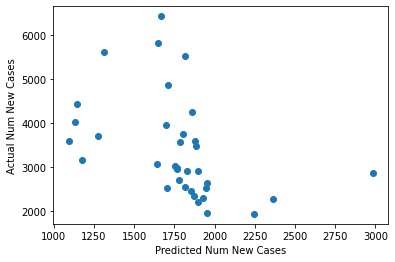

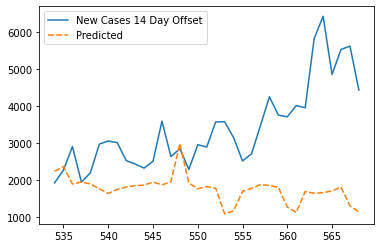

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) score: 0.761557777312244


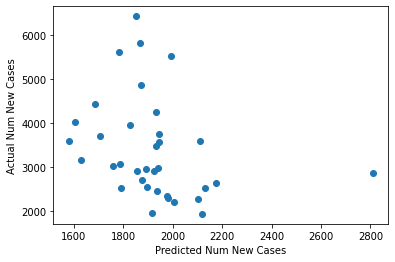

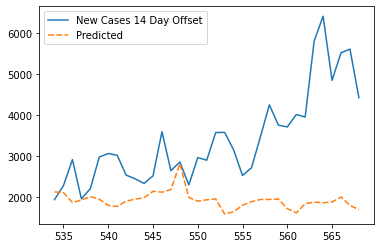

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) score: 0.7764507484165294


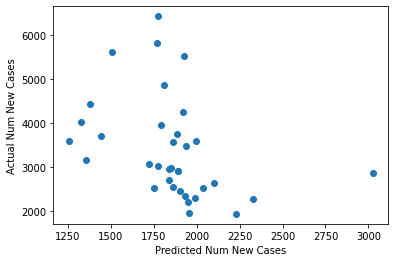

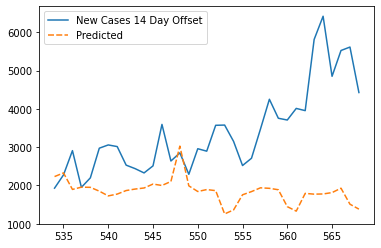

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) score: 0.6376288079837619


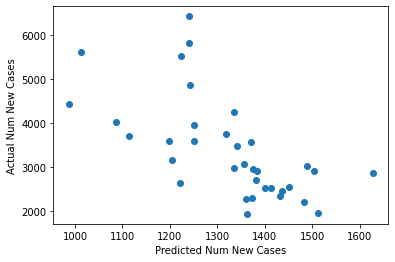

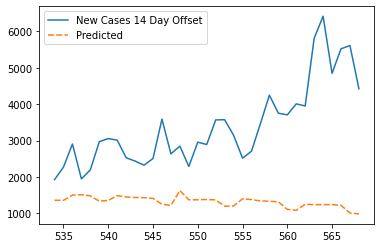

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False) score: 0.758055376220952


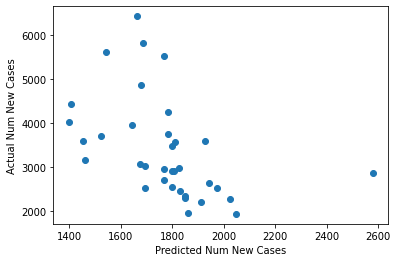

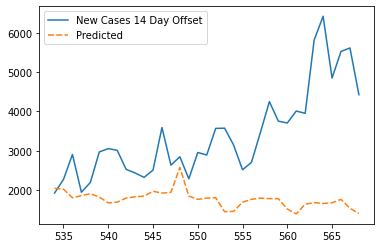

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) score: 0.7662155961988598


/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


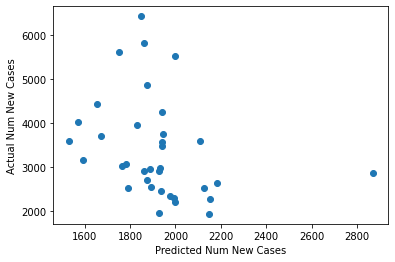

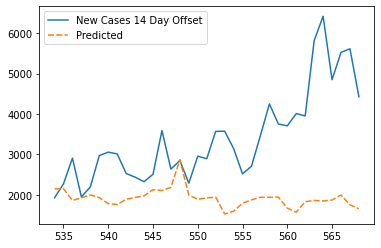

In [634]:
for model in models:
    model.fit(x_train_offset, y_train_offset)
    score= model.score(x_train_offset, y_train_offset)
    print('{} score: {}'.format(model, score))
    y_pred= model.predict(x_test_offset)
    # Use our new model to make predictions
    plt.scatter(y_pred, y_test_offset)
    plt.xlabel('Predicted Num New Cases')
    plt.ylabel('Actual Num New Cases')
    plt.show()
    print('\n')
    df= y_test_offset.copy()
    y_pred= model.predict(x_test_offset)
    df['Predicted']= y_pred

    sns.lineplot(data=df)
    plt.legend()
    plt.show()
    
    

#### Our two models with the best R2 values are Linear Regression and Lasso Regression

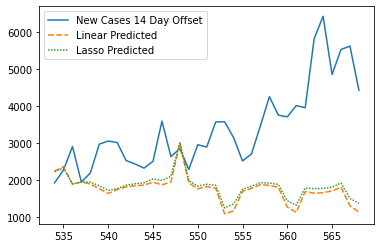

In [635]:
# Let's see what the actual lines look like
linear= linear_model.LinearRegression()
lasso= linear_model.Lasso()

linear.fit(x_train_offset, y_train_offset)
y_pred_linear= linear.predict(x_test_offset)

lasso.fit(x_train_offset, y_train_offset)
y_pred_lasso= lasso.predict(x_test_offset)

y_test_offset_values= y_test_offset.values


'''df= pd.DataFrame({'Actual': y_test_offset_values, 'Linear Predicted': y_pred_linear, 'Lasso Predicted': y_pred_lasso})
sns.lineplot(data=df)
plt.legend()
plt.show()'''

df= y_test_offset.copy()
df['Linear Predicted']= y_pred_linear
df['Lasso Predicted']= y_pred_lasso

sns.lineplot(data=df)
plt.legend()
plt.show()


In [636]:
print(x_train_offset)

[[ 1.25242600e+00  6.69586819e-01  1.56994318e+00  1.50665718e+00
   1.27301644e+00 -1.35894705e+00  2.25806969e+00  1.34677736e+00
   2.75460555e+00]
 [ 1.41784075e+00  5.90479516e-01  2.09256627e+00  1.50665718e+00
   1.27301644e+00 -1.46376941e+00  1.49976290e+00  9.45927592e-01
   1.53921282e+00]
 [ 1.58325551e+00  6.69586819e-01  2.65874129e+00  9.48749536e-01
  -3.55187304e-01 -5.20368154e-01  1.63212267e+00  1.33965218e+00
   1.25535690e+00]
 [ 1.21107231e+00  5.90479516e-01  1.43928740e+00  1.59248912e+00
   1.31702195e+00 -1.35894705e+00  1.02785214e+00  1.71410840e+00
   8.90643395e-01]
 [ 1.21107231e+00  5.90479516e-01  1.30863163e+00  1.50665718e+00
   1.31702195e+00 -1.35894705e+00  1.04098639e+00  1.70810824e+00
   9.99575583e-01]
 [ 1.29377969e+00  6.69586819e-01  1.26507971e+00  1.50665718e+00
   1.31702195e+00 -1.35894705e+00  1.23780998e+00  1.65723191e+00
   1.08144133e+00]
 [ 1.25242600e+00  5.90479516e-01  1.09087201e+00  1.46374121e+00
   1.36102746e+00 -1.3589470

In [637]:
# Let's try to optimize Lasso a bit and see what happens
# find optimal alpha for Lasso
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for a in alpha:
    lasso= linear_model.Lasso(alpha=a)
    lasso.fit(x_train_offset, y_train_offset)
    score= lasso.score(x_train_offset, y_train_offset)
    print('Alpha of {} gives us an R2 of {}'.format(a, score))
    print('\n')


Alpha of 0.001 gives us an R2 of 0.7774367485667538


Alpha of 0.01 gives us an R2 of 0.7774366423425335


Alpha of 0.1 gives us an R2 of 0.7774263774247475


Alpha of 1 gives us an R2 of 0.7764507484165294


Alpha of 10 gives us an R2 of 0.7546144958451089


Alpha of 100 gives us an R2 of 0.6530320957914411


Alpha of 1000 gives us an R2 of 0.0




/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1446710.269197126, tolerance: 6484.6839559523805
  positive)
/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39975.29904304072, tolerance: 6484.6839559523805
  positive)


### Adding a 21 Day Offset 

In [638]:
# Add a new column that has the Number of new cases 21 days in the Future
ca['New Cases 21 Day Offset']= ca['Num New Cases'].shift(-20)
ca.head(10)

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases,New Cases 14 Day Offset,New Cases 21 Day Offset
450,California,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0,149.625000,98.747059,161.364286,7,0,0.000000,0.0,1.0,14.0
451,California,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0,128.067973,85.542941,127.493810,7,0,0.000000,0.0,1.0,19.0
452,California,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0,131.830676,98.512353,119.583333,7,0,0.000000,0.0,5.0,12.0
453,California,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0,114.652568,110.847059,109.419524,7,0,0.000000,0.0,5.0,60.0
454,California,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0,115.025946,110.649412,112.455238,7,0,0.000000,0.0,7.0,7.0
455,California,2020-02-20,2.0,1.0,12.0,1.0,0.0,0.0,120.621216,108.973529,114.736667,8,0,14.285714,1.0,10.0,23.0
456,California,2020-02-21,1.0,0.0,8.0,0.0,1.0,0.0,143.535541,117.529412,139.326190,9,0,12.500000,1.0,12.0,50.0
457,California,2020-02-22,0.0,0.0,-3.0,-4.0,1.0,1.0,142.735676,97.484118,153.515714,9,0,0.000000,0.0,14.0,68.0
458,California,2020-02-23,4.0,1.0,16.0,3.0,2.0,0.0,119.011486,88.245294,112.794286,9,0,0.000000,0.0,19.0,61.0
459,California,2020-02-24,2.0,0.0,12.0,1.0,4.0,0.0,111.661351,109.474706,108.403810,11,0,22.222222,2.0,12.0,97.0


In [639]:
# We will now have NaNs on the last 21 days of our dataset so we create a new dataset with those NA's cropped
ca_cropped_21= ca.dropna()
ca_cropped_21.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 450 to 561
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    112 non-null    object 
 1   date                     112 non-null    object 
 2   retail_and_recreation    112 non-null    float64
 3   grocery_and_pharmacy     112 non-null    float64
 4   parks                    112 non-null    float64
 5   transit                  112 non-null    float64
 6   workplace                112 non-null    float64
 7   residential              112 non-null    float64
 8   driving gps hits         112 non-null    float64
 9   transit gps hits         112 non-null    float64
 10  walking gps hits         112 non-null    float64
 11  cases                    112 non-null    int64  
 12  deaths                   112 non-null    int64  
 13  Growth Rate              112 non-null    float64
 14  Num New Cases           

In [640]:
# We need to reallocate test and train now that there are only 112 observations
# First 77 rows will be training (70%) and the rest will be test
x_train_offset_21= ca_cropped_21[:77].drop(columns=['state', 'date', 'cases', 'deaths', 'Growth Rate', 'Num New Cases', 'New Cases 14 Day Offset','New Cases 21 Day Offset'])
x_test_offset_21= ca_cropped_21[77:].drop(columns=['state', 'date', 'cases', 'deaths', 'Growth Rate', 'Num New Cases', 'New Cases 14 Day Offset', 'New Cases 21 Day Offset'])
y_train_offset_21= pd.DataFrame(ca_cropped_21['New Cases 21 Day Offset'][:77])
y_test_offset_21= pd.DataFrame(ca_cropped_21['New Cases 21 Day Offset'][77:])

print(x_train_offset_21.shape)
print(x_test_offset_21.shape)
print(y_train_offset_21.shape)
print(y_test_offset_21.shape)
print(x_train_offset_21.columns)

(77, 9)
(35, 9)
(77, 1)
(35, 1)
Index(['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit',
       'workplace', 'residential', 'driving gps hits', 'transit gps hits',
       'walking gps hits'],
      dtype='object')


(77, 9)
(35, 9)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) score: 0.6341287014754475


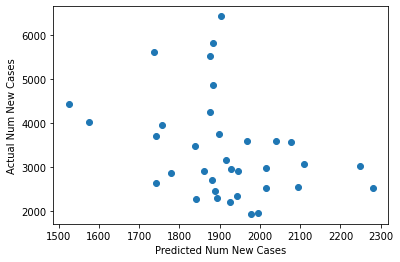



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) score: 0.6318216853974172


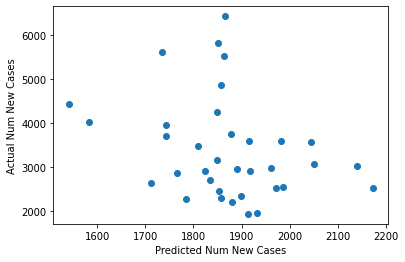



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) score: 0.633837251985001


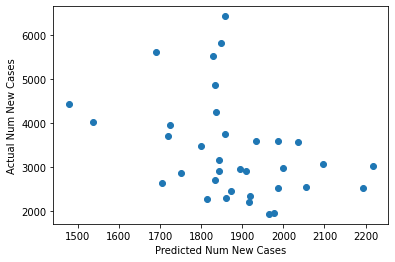



ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) score: 0.5680688508583187


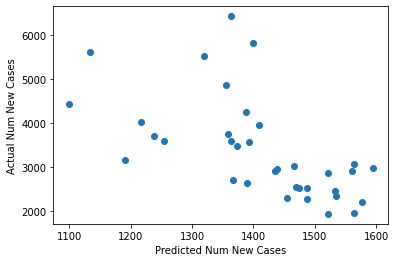



LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False) score: 0.6306092163207586


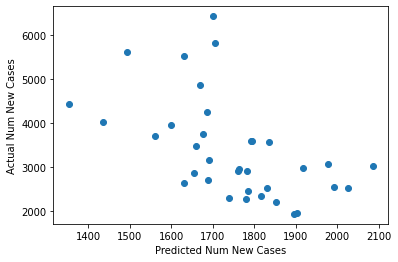



BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) score: 0.6191917554406801


/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


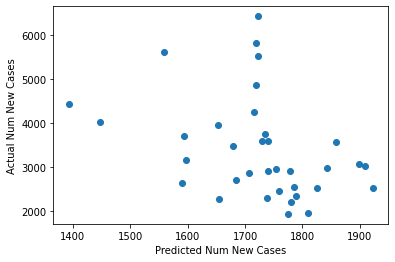

In [641]:
# scaling data
scaler = StandardScaler()
x_train_offset_21 = scaler.fit_transform(x_train_offset_21)
x_test_offset_21 = scaler.transform(x_test_offset_21)

print(x_train_offset_21.shape)
print(x_test_offset_21.shape)

# define models
linear= linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()

for model in models: 
    model.fit(x_train_offset_21, y_train_offset_21)
    score= model.score(x_train_offset_21, y_train_offset_21)
    print('{} score: {}'.format(model, score))
    y_pred= model.predict(x_test_offset_21)
    # Use our new model to make predictions
    plt.scatter(y_pred, y_test_offset_21)
    plt.xlabel('Predicted Num New Cases')
    plt.ylabel('Actual Num New Cases')
    plt.show()
    print('\n')